Here is my top 10 list:

1. Indexing
2. Renaming
3. Handling missing values
4. map(), apply(), applymap()
5. groupby()
6. New Columns = f(Existing Columns)
7. Basic stats
8. Merge, join
9. Plots
10. Scikit-learn conversion

Link: http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/#create

# Example DataFrame

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


# Part 1. Indexing

## Selecting a subset of columns

It is one of the simplest features but was surprisingly difficult to find.   

Suppose you wanted to index only using columns int_col and string_col, you would use the three methods as shown below.

In [2]:
# Method 1:
df.ix[:, ['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


In [10]:
# Method 2:
df.loc[:, ['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


In [11]:
# Method 3:
df[['float_col','int_col']]

,float_col,int_col
0,0.1,1
1,0.2,2
2,0.2,6
3,10.1,8
4,NaN,-1


## Conditional indexing

In [13]:
# Method 1:
df[df['float_col'] > 0.15]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c


In [15]:
# Method 2:
df.loc[df['float_col'] > 0.15, ['float_col','int_col']]

,float_col,int_col
1,0.2,2
2,0.2,6
3,10.1,8


In [16]:
# Method 3:
df.ix[df['float_col'] > 0.15, ['float_col','int_col']]

,float_col,int_col
1,0.2,2
2,0.2,6
3,10.1,8


**One can select multiple boolean operators (| for or, & for and, and ~ for not) and group them by parenthisis.**

In [17]:
df[(df['float_col'] > 0.1) & (df['int_col']>2)]

,float_col,int_col,str_col
2,0.2,6,None
3,10.1,8,c


In [18]:
df[~(df['float_col'] > 0.1)]

,float_col,int_col,str_col
0,0.1,1,a
4,NaN,-1,a


Note: NaN < 0.

## Selecting a subset of rows

In [12]:
df.iloc[1:3]

,float_col,int_col,str_col
1,0.2,2,b
2,0.2,6,None


# Part 2: Renaming columns

Use the rename method to rename columns. It copies the data to another DataFrame

In [19]:
df2 = df.rename(columns={'int_col' : 'some_other_name'})

df2

,float_col,some_other_name,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


Set the inplace = True flag incase you want to modify the existing DataFrame.

In [20]:
df2.rename(columns={'some_other_name' : 'int_col'}, inplace = True)

In [21]:
df2

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


# Part 3: Handling missing values

## Checking whether there is any NaN in each column and the mount of missing values.

In [34]:
df2

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [33]:
df2.count()

float_col    4
int_col      5
str_col      4
dtype: int64

In [24]:
# Series count() function will automatically ignore the NaN value.
df2['str_col'].count()

4

In [25]:
# len() will give the total length, regardless Nan or others.
len(df2['str_col'])

5

**To count the null values in df2 (method 1):**

In [36]:
print 'The number of missing values in str_col column: ', sum(df2['str_col'].isnull())

The number of missing values in str_col column:  1


**To count the null values in df2 (method 2):**

In [37]:
print 'The number of missing values in str_col column: ',len(df2['str_col']) - df2['str_col'].count()

The number of missing values in str_col column:  1


**To count the null values in df2 (method 3):**

In [40]:
def count_missing(data):
    return sum(data.isnull())

In [41]:
print "Missing values per column:"
print df2.apply(count_missing, axis = 0) #axis=0 defines that function is to be applied on each column

Missing values per column:
float_col    1
int_col      0
str_col      1
dtype: int64


Handling of missing values can be performed beautifully using pandas.

## Drop missing values

The **dropna** can used to drop rows or columns with missing data (NaN). By default, it drops all rows with any missing entry.

In [38]:
df2.dropna()

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
3,10.1,8,c


## Fill missing values
The fillna method on the other hand can be used to fill missing data (NaN). The example below shows a simple replacement using the mean of the available values.

In [39]:
df3 = df.copy()

mean = df3['float_col'].mean()

df3['float_col'].fillna(mean)

0     0.10
1     0.20
2     0.20
3    10.10
4     2.65
Name: float_col, dtype: float64

# Part 4: Map, Apply

Forget writing for loops while using pandas. One can do beautiful vectorized computation by applying function over rows and columns using the map, apply and applymap methods.

## map - Series

The map operation operates over each element of a Series.

In [44]:
df['str_col'].dropna().map(lambda x : 'map_' + x)

0    map_a
1    map_b
3    map_c
4    map_a
Name: str_col, dtype: object

## apply - Dataframe column

The apply is a pretty flexible function which, as the name suggests, applies a function along any axis of the DataFrame. The examples show the application of the sum function over columns. 

In [47]:
df[['int_col','float_col']].apply(sum)

int_col      16.0
float_col     NaN
dtype: float64

Note: the outcome of float_col is NaN, because this column has missing value

In [65]:
df[df.float_col.isnull() == False][['float_col']].apply(sum)

float_col    10.6
dtype: float64

## applymap - Dataframe

The applymap operation can be used to apply the function to each element of the DataFrame.

In [72]:
def some_fn(x):
    if type(x) is str:
        return 'applymap_' + x
    elif x:
        return x * 100

In [73]:
df.applymap(some_fn)

,float_col,int_col,str_col
0,10.0,100,applymap_a
1,20.0,200,applymap_b
2,20.0,600,None
3,1010.0,800,applymap_c
4,NaN,-100,applymap_a


## Vectorized mathematical and string operations

One can perform vectorized calculations using simple operators and numpy functions.

In [81]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3]})
    
df

,A,B
0,1,1.2
1,2,1.3


In [82]:
df['C'] = df['A'] + df['B']

df

,A,B,C
0,1,1.2,2.2
1,2,1.3,3.3


In [83]:
df["D"] = df["A"]*3

df

,A,B,C,D
0,1,1.2,2.2,3
1,2,1.3,3.3,6


In [84]:
df["E"] = np.sqrt(df["A"])

df

,A,B,C,D,E
0,1,1.2,2.2,3,1.000000
1,2,1.3,3.3,6,1.414214


Also, vectorized string operations are easy to use.

In [85]:
df = pd.DataFrame(data={"A":[1,2], "B":[1.2,1.3], "Z":["a","b"]})

df["F"] = df.Z.str.upper()

df

,A,B,Z,F
0,1,1.2,a,A
1,2,1.3,b,B


# Part 5: GroupBy

The groupby method let’s you perform SQL-like grouping operations. The example below shows a grouping operation performed with str_col columns entries as keys. It is used to calculate the mean of the float_col for each key. For more details, please refer to the split-apply-combine description on the pandas website.

In [114]:
df = pd.DataFrame({'int_col' : [1,2,6,8,-1], 'float_col' : [0.1, 0.2,0.2,10.1,None], 'str_col' : ['a','b',None,'c','a']})

df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


**Groupby a specific column**

In [106]:
grouped = df['float_col'].groupby(df['str_col'])

In [107]:
# Biult-in function mean()
grouped.mean()

str_col
a     0.1
b     0.2
c    10.1
Name: float_col, dtype: float64

In [108]:
# Using apply to sum the values
grouped.apply(sum)

str_col
a     0.1
b     0.2
c    10.1
dtype: float64

In [128]:
grouped.groups

{'a': [0L, 4L], 'b': [1L], 'c': [3L]}

**grouped.TAB** to check the functins after groupby.

**Groupby the entire datafram and then selecting a column to compute the mean value**

In [98]:
df.groupby(['str_col'])['float_col'].mean()

str_col
a     0.1
b     0.2
c    10.1
Name: float_col, dtype: float64

In [125]:
df.groupby(['str_col'])['float_col'].apply(sum)

str_col
a     0.1
b     0.2
c    10.1
Name: float_col, dtype: float64

In [124]:
df.groupby(['str_col'])['float_col'].get_group('a')

0    0.1
4    NaN
Name: float_col, dtype: float64

# Part 6: New Columns = f(Existing Columns)

Generating new columns from existing columns in a data frame is an integral part of my workflow. This was one of the hardest parts for me to figure out. I hope these examples will save time and effort for other people.

I will try to illustrate it in a piecemeal manner – multiple columns as a function of a single column, single column as a function of multiple columns, and finally multiple columns as a function of multiple columns.

In [131]:
df4 = df.copy()
df4

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## multiple columns as a function of a single column

I often have to generate multiple columns of a DataFrame as a function of a single columns. 

In [132]:
def two_three_strings(x):
    return x*2, x*3

In [135]:
df4['twice'],df4['thrice'] = zip(*df4['int_col'].map(two_three_strings))

# Or
# df4['twice'],df4['thrice'] = zip(*df4['int_col'].apply(two_three_strings))

In [136]:
df4

,float_col,int_col,str_col,twice,thrice
0,0.1,1,a,2,3
1,0.2,2,b,4,6
2,0.2,6,None,12,18
3,10.1,8,c,16,24
4,NaN,-1,a,-2,-3


More: [zip()](https://docs.python.org/2/library/functions.html#zip)

## single column as a function of multiple columns
It’s sometimes useful to generate multiple DataFrame columns from a single column. It comes in handy especially when methods return tuples.

In [137]:
df5 = df.copy()

In [138]:
def sum_two_cols(series):
    return series['int_col'] + series['float_col']

In [139]:
df5['sum_col'] = df5.apply(sum_two_cols,axis=1)

df5

,float_col,int_col,str_col,sum_col
0,0.1,1,a,1.1
1,0.2,2,b,2.2
2,0.2,6,None,6.2
3,10.1,8,c,18.1
4,NaN,-1,a,NaN


## multiple columns as a function of multiple columns
Finally, a way to generate a new DataFrame with multiple columns based on multiple columns in an existing DataFrame. 

In [146]:
import math

def int_float_squares(series):
    return pd.Series({'int_sq' : series['int_col']**2, 'flt_sq' : series['float_col']**2})

In [147]:
df.apply(int_float_squares, axis = 1)

,flt_sq,int_sq
0,0.01,1.0
1,0.04,4.0
2,0.04,36.0
3,102.01,64.0
4,NaN,1.0


# Part 7: Stats

Pandas provides nifty methods to understand your data. I am highlighting the **describe, correlation, covariance, and correlation ** methods that I use to quickly make sense of my data.

In [151]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


## describe
The describe method provides quick stats on all suitable columns.

In [148]:
df.describe()

,float_col,int_col
count,4.00000,5.000000
mean,2.65000,3.200000
std,4.96689,3.701351
min,0.10000,-1.000000
25%,0.17500,1.000000
50%,0.20000,2.000000
75%,2.67500,6.000000
max,10.10000,8.000000


## covariance
The cov method provides the covariance between suitable columns.

In [150]:
df.cov()

,float_col,int_col
float_col,24.670000,12.483333
int_col,12.483333,13.700000


## correlation
The corr method provides the correlation between suitable columns.

In [152]:
df.corr()

,float_col,int_col
float_col,1.000000,0.760678
int_col,0.760678,1.000000


# Part 8: Merge and Join

Pandas supports database-like joins which makes it easy to link data frames.
I will use the simple example to highlight the joins using the merge command.

In [154]:
df

,float_col,int_col,str_col
0,0.1,1,a
1,0.2,2,b
2,0.2,6,None
3,10.1,8,c
4,NaN,-1,a


In [156]:
other = pd.DataFrame({'str_col' : ['a','b'], 'some_val' : [1, 2]})

other

,some_val,str_col
0,1,a
1,2,b


In [157]:
pd.merge(df,other,on='str_col',how='inner') # 'outer'

,float_col,int_col,str_col,some_val
0,0.1,1,a,1
1,NaN,-1,a,1
2,0.2,2,b,2


In [158]:
pd.merge(df,other,on='str_col',how='left') # 'right'

,float_col,int_col,str_col,some_val
0,0.1,1,a,1.0
1,0.2,2,b,2.0
2,0.2,6,None,NaN
3,10.1,8,c,NaN
4,NaN,-1,a,1.0


# Part 9: Plot

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

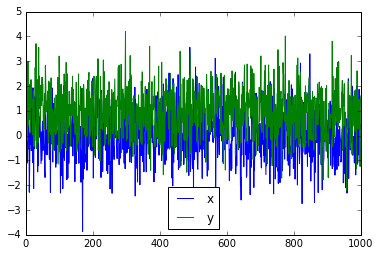

In [161]:
plot_df = pd.DataFrame(np.random.randn(1000,2),columns=['x','y'])

plot_df['y'] = plot_df['y'].map(lambda x : x + 1)

plot_df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x082227D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0886E550>]], dtype=object)

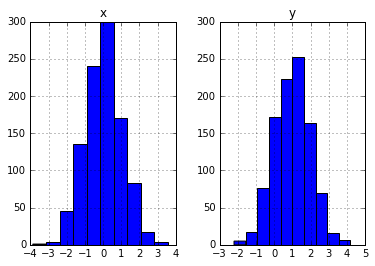

In [162]:
plot_df.hist()

# Part 10: Scikit-learn conversion

This took me a non-trivial amount of time to figure out and I hope others can avoid this mistake. According to the pandas documentation, the ndarray object obtained via the values method has object dtype if values contain more than float and integer dtypes. Now even if you slice the str columns away, the resulting array will still consist of object dtype and might not play well with other libraries such as scikit-learn which are expecting a float dtype. Explicitly converting type works well in this scenario.

In [163]:
df.values[:,:-1]

array([[0.1, 1L],
       [0.2, 2L],
       [0.2, 6L],
       [10.1, 8L],
       [nan, -1L]], dtype=object)

In [165]:
# convert int into float
df.values[:,:-1].astype(float)

array([[  0.1,   1. ],
       [  0.2,   2. ],
       [  0.2,   6. ],
       [ 10.1,   8. ],
       [  nan,  -1. ]])

 The [sklearn-pandas library](https://github.com/paulgb/sklearn-pandas) looks great for bridging pandas scikit-learn.